- Student 1 Name: Francisco HERNANDEZ
- Student 2 Name: Octavio GUERRERO

change the name of this notebook to  `name_1_name_2_notebook_??.ipynb` with *no spaces, no accents and no strange characters!* and where `??` stands for the number of the notebook you are working on.

# PPM Numerical Methods -- Numerical Methods for Physics

# Numerical methods: basics and linear regression

# Numbers, approximations and errors

Import the needed packages

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Write a program that determines the underflow and overflow limits

In [4]:
def overUnderFlow(over):
    x = np.float64(1000)
    y = 0
    if(not over):
        x = -x

    while(not np.isinf(x)):
        y = x
        x = x*10

    return y

print("Overflow: ",overUnderFlow(True),"\nUnderflow: ", overUnderFlow(False))

Overflow:  9.999999999999998e+307 
Underflow:  -9.999999999999998e+307


/var/folders/pn/7xb0xrx119l4_783pgg7gp140000gn/T/ipykernel_34555/1678146783.py:9: RuntimeWarning: overflow encountered in double_scalars
  x = x*10


### Write a program to determine the machine precision (within a factor of two)

In [5]:
x = 0.1
while(1+x!=1):
    x=x/10
    if(1+x==1):
        print(x)

1.0000000000000001e-16


### Explore subtractive cancellation

Consider the fucntions:

$$f(x)=\frac{1-\sqrt{1-t(x)^2}}{t(x)}$$

 where 
 
 $$t(x)=e^{-\pi x}$$

- plot the function $f(x)$ for $x$ in the range $[5,7]$

Rewrite the function $f(x)$ as

$$ \frac{t(x)}{1+\sqrt{1-t(x)^2}} $$

- plot on the same graph the two functions and comment

- label the axes

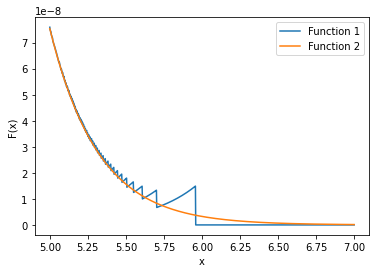

In [6]:
def subsCanc(x, typeFunc):
    t_x = np.exp(-np.pi * x)
    value = 0
    if(typeFunc == 1):
        value = (1-np.sqrt(1-t_x**2))/t_x
    else:
        value = t_x/(1+np.sqrt(1-t_x**2))
    return value
testArr = np.linspace(5,7,1000)
testArr1 = np.array([subsCanc(n,1) for n in  testArr])
testArr2 = np.array([subsCanc(n,2) for n in  testArr])

plt.plot(testArr, testArr1, label="Function 1")
plt.plot(testArr, testArr2, label="Function 2")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()



# Linear regression

### Linear regression on simple data sets

- Write a function that given the input data returns the fitting parameters $a_1$ and $a_2$. The function template is:

```python
def lin_reg(x_data, y_data):
    """Function documentation"""
    

    return (a0, a1)
```

- Test your function on a simple set of data: plot the data and the fitted function

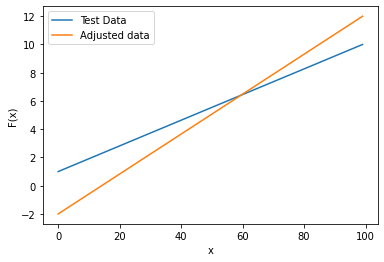

In [7]:
def lin_reg(data1, data2):

    x_mean= np.sum(data1)/data1.size
    y_mean = np.sum(data2)/data2.size

    sum_1 = np.sum(data1*data2) - data1.size * x_mean * y_mean

    sum_2 = np.sum(data1**2) - data1.size*x_mean**2

    a1 = sum_1/sum_2
    a0 = y_mean - a1*x_mean

    return (a0,a1)

x_data= np.linspace(1,10,100)
y_data = np.linspace(-2,12,100)

testData = (lin_reg(x_data, y_data))

plt.plot(x_data, label="Test Data")
plt.plot(testData[0]+testData[1]*x_data, label="Adjusted data")

plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.legend()
plt.show()

### Linear regression on solar wind data

We are now going to perform a linear regression fitting on measurements of the solar wind from the spacecraft [ULYSSE](https://en.wikipedia.org/wiki/Ulysses_(spacecraft)).

- The solar wind data is in the file `ulysse.txt` in the `data/` folder. The data file contains thre columns
    1. First column: the heliocentric distance in AU (astronomical units), $r$
    2. Second column: the solar wind density in m$^{-3}$, $n(r)$
    3. Third column: the temperature in Kelvin, $T(r)$
    
- load and plot the data (always label your plots and put the units!!)

<Figure size 432x288 with 0 Axes>

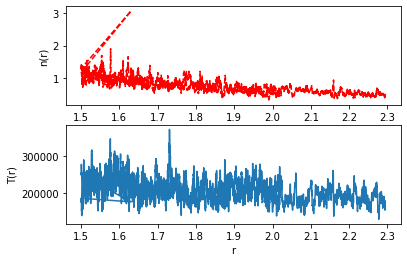

In [21]:
data = np.loadtxt('data/ulysse.txt')
helocentric_r = data[:,0]
solarwind = data[:,1]
temp = data[:,2]

fig = plt.figure()


figure, axis = plt.subplots(2)

axis[0].plot(helocentric_r,solarwind, 'r--')
axis[0].set_xlabel("r")
axis[0].set_ylabel("n(r)")

axis[1].plot(helocentric_r,temp)
axis[1].set_xlabel("r")
axis[1].set_ylabel("T(r)")




plt.show()

The solar wind is "well" approximated as steady-state, spherically symmetric expanding plasma sphere. The expected density as a function of heliocentric distance is: $$n(r) = \alpha r^{-2}$$
 - From conservation of mass and momentum, can you show why it is so?
 - Fit the satellite data...be careful, you want to do a linear regression on a power law data.
 - Plot the data and your fit.
     - Would you conclude that the solar wind density distribution is as "expected"?

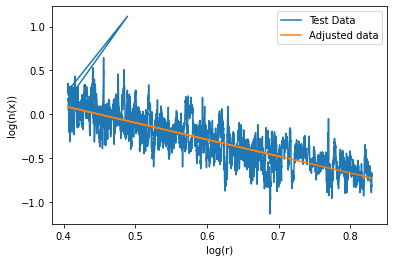

In [13]:
x_data1= np.log(helocentric_r)
y_data1 = np.log(solarwind)

testData = (lin_reg(x_data1, y_data1))

plt.plot((x_data1),(y_data1), label="Test Data")
plt.plot(x_data1,(testData[0])+testData[1]*(x_data1), label="Adjusted data")

plt.xlabel("log(r)")
plt.ylabel("log(n(x))")
plt.legend()
plt.legend()
plt.show()

Assuming the solar wind to behave as a perfect gas ($\gamma = 5/3$), the pressure is then given by: $$P(r) = k_{B} n(r) T(r)$$

 - By fitting the pressure data as function of distance, show that the solar wind expansion is neither adiabatic nor isothermal

1.38064852e-23


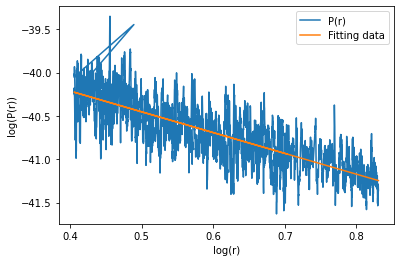

In [29]:
def pressure_cal(n,t):
    k = 0.138064852e-22
    print(k)
    p = np.array([k*n[i]*t[i] for i in range(n.size)])
    return p

distance_r = np.log(helocentric_r)
pressure_r = np.log(pressure_cal(solarwind,temp))
linear_values = lin_reg(distance_r,pressure_r)

plt.plot(distance_r, pressure_r, label="P(r)")
plt.plot(distance_r, linear_values[0] + linear_values[1]*distance_r, label="Fitting data")
plt.xlabel("log(r)")
plt.ylabel("log(P(r))")
plt.legend()
plt.show()



